# Brian Porter's - Datascience Assessment Notebook

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Statsmodel APIs
import statsmodels.api as sm
import statsmodels.formula.api as smf  # uses R style formulas

In [153]:
raw_data = pd.read_csv("dataset1.csv")
data = raw_data.copy()

### Cleaning/Tweaking Data

In [154]:
# converts dates to dtype: datetime64
data['time_stamp'] = pd.to_datetime(data['time_stamp'])  
# data['time_stamp']


In [177]:
# creating numerical value for coupon code for easier graphing/trend analysis
data['coupon_num'] = data['coupon_code']
data['coupon_num'] = data['coupon_num'].replace([np.nan, 'code1', 'code2', 'code3'], [0, 1, 2, 3])
data['coupon_num'] = data['coupon_num'].where((pd.notnull(data['coupon_num'])), 0)
data.head()

pd.unique(data.coupon_num)

array([0, 1, 3, 2])

### Exploring Data

In [178]:
data.head()

,user_id,action_type,time_stamp,dealer,coupon_code,dist_channel,item_name,item_price,coupon_num
0,224970131,partner_integration,2014-10-07,NaN,NaN,NaN,NaN,0,0
1,224340667,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,0
2,225046537,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,0
3,225046537,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,0
4,219614121,partner_integration,2014-10-08,NaN,NaN,NaN,NaN,0,0


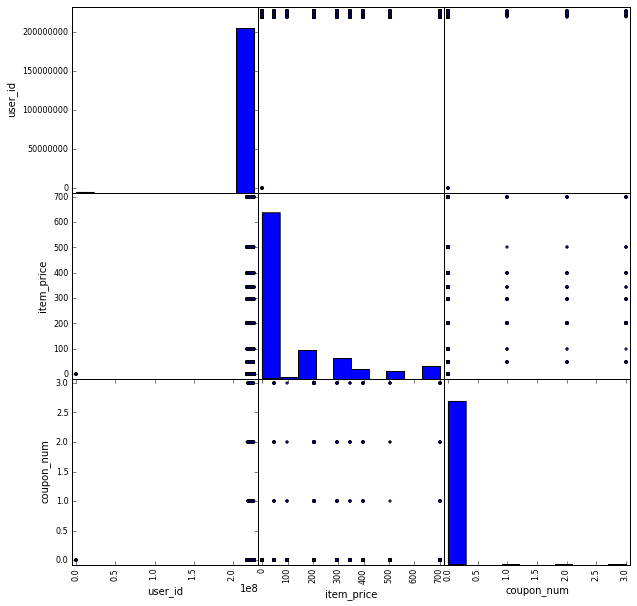

In [180]:
from pandas.tools.plotting import scatter_matrix
scat = scatter_matrix(data, figsize = (10,10))

In [181]:
# Unique items in table
unique_actions = pd.unique(data.action_type)
unique_coup_codes = pd.unique(data.coupon_code)
unique_items = pd.unique(data.item_name)

print("Unique Actions: ", unique_actions)  # prints unique actions
print("Unique Coupons: ", unique_coup_codes)  # prints unique coupon codes
print("Unique Items:   ", unique_items)  # prints unique coupon codes


Unique Actions:  ['partner_integration' 'email_sub' 'email_unsub' 'purchase']
Unique Coupons:  [nan 'code1' 'code3' 'code2']
Unique Items:    [nan 'Launch Button' 'Dashboard + Monitor' 'Spy Camera' 'Alarm' 'Dashboard'
 'Signal Amplifier' 'Status Indicator Lg' 'Status Indicator Sm'
 'Status Indicator Md' 'Base Station' 'Remote']


In [191]:
# finding number of unique users, average actions & purchases per user
unique_users = (pd.unique(data.user_id))
purchase_data = data[data['action_type'] == 'purchase']

In [193]:
print("Unique Users: ", len(unique_users))
print("Actions/User: ", "{:.2f}".format(len(data.user_id)/len(unique_users)))
print("Purchases/User: ", "{:.2f}".format(len(purchase_data.user_id)/len(unique_users)))

Unique Users:  16347
Actions/User:  3.24
Purchases/User:  1.32


In [61]:
# data_coupon_code_nonull = data.dropna()

In [99]:
# data that only contains purchases with coupon
coup_codes = unique_coup_codes[1:4]
coupon_data = data.loc[data['coupon_code'].isin(coup_codes)]

print(len(coupon_data))
coupon_data

374


,user_id,action_type,time_stamp,dealer,coupon_code,dist_channel,item_name,item_price
15168,224518779,purchase,2014-11-11,other,code1,Dist Partners,Launch Button,699
15244,224722697,purchase,2014-08-11,online,code3,Online,Status Indicator Sm,203
24078,225551525,purchase,2014-10-13,other,code3,Dist Partners,Launch Button,699
24085,224865895,purchase,2014-08-31,online,code1,Online,Launch Button,699
24524,225436157,purchase,2014-11-26,other,code3,Online,Dashboard,344
24751,218583905,purchase,2014-10-15,other,code2,Dist Partners,Status Indicator Lg,397
24778,224252117,purchase,2014-05-19,online,code2,Online,Status Indicator Lg,397
24786,224467673,purchase,2014-06-23,other,code1,Online,Status Indicator Lg,397
24788,225090053,purchase,2014-10-03,other,code3,Dist Partners,Status Indicator Lg,397
24792,220404999,purchase,2014-04-02,online,code1,Online,Status Indicator Lg,397


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114a6d860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x111591a20>]], dtype=object)

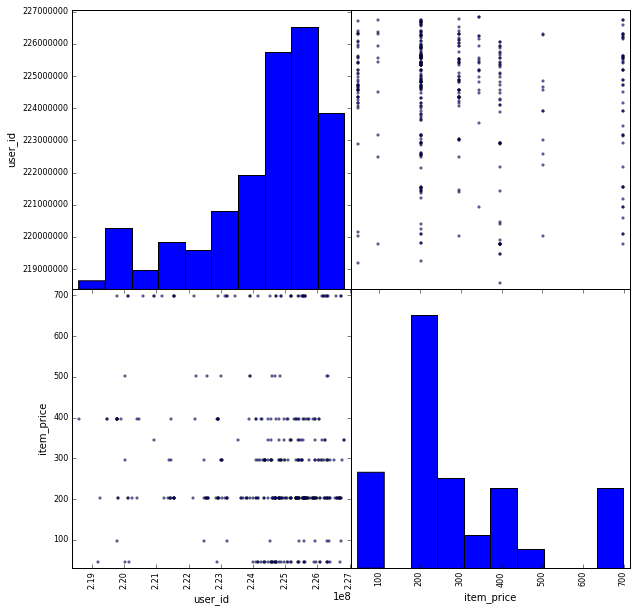

In [179]:
scatter_matrix(coupon_data, figsize = (10,10))

In [128]:
stat_inds = ['Status Indicator Sm', 'Status Indicator Md', 'Status Indicator Lg']
stat_ind_data = data.loc[data['item_name'].isin(stat_inds)]
# stat_ind_data = stat_ind_data[stat_ind_data['item_name'] == 'Status Indicator Md']
# stat_ind_data = coupon_data = data[data['item_name'] == 'Status Indicator Lg']
# stat_ind_data = coupon_data = data[data['at'] == 'Status Indicator Lg']
print(len(stat_ind_data))
stat_ind_data['coupon_code']
stat_ind_data['coupon_num'] ==
    for i in stat_ind_data['coupon_code']:
        if i == 'code1':
            i = 1
        if i == 'code2':
            i = 2
        if i == 'code3':
            i = 3
        else:
            i = 0

SyntaxError: invalid syntax (<ipython-input-128-44764da93b1b>, line 8)

In [116]:
# plt.scatter(stat_ind_data[:,2], stat_ind_data[:,7])

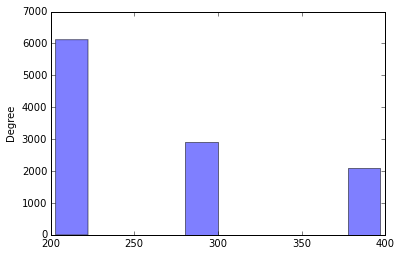

In [130]:
stat_ind_data['item_price'].plot(kind='hist', alpha=0.5)